In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import sklearn
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,LogisticRegression, LassoCV)
from sklearn.model_selection import (KFold, cross_val_score, train_test_split, cross_validate)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [2]:
df_train_ori = pd.read_csv('./Admission_Predict.csv')
# Dropping a few columns.  Waterfront and view are binary. 
df_train_ori = df_train_ori.drop(['Serial No.'],axis=1)
df_train_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
ChanceofAdmit        500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


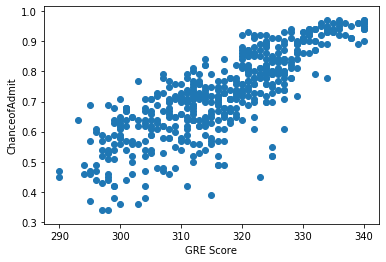

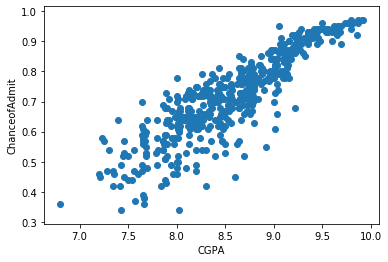

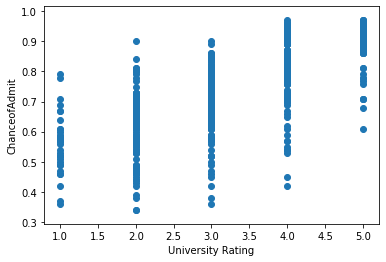

In [3]:
#In this project, as we are predicting the SalePrice of a property, it is a common sense that there should be a linear relationsip
#between the area of the property and the sale price of the property. (The area of the property is in cloumn 'GrLivArea')

#We will use scatter plot to see if the relationship is linear. 
plt.scatter(x = df_train_ori['GRE Score'], y = df_train_ori['ChanceofAdmit'])
plt.ylabel('ChanceofAdmit')
plt.xlabel('GRE Score')
plt.show()

#We will use scatter plot to see if the relationship is linear. 
plt.scatter(x = df_train_ori['CGPA'], y = df_train_ori['ChanceofAdmit'])
plt.ylabel('ChanceofAdmit')
plt.xlabel('CGPA')
plt.show()
#We will use scatter plot to see if the relationship is linear. 
plt.scatter(x = df_train_ori['University Rating'], y = df_train_ori['ChanceofAdmit'])
plt.ylabel('ChanceofAdmit')
plt.xlabel('University Rating')
plt.show()

In [30]:

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-', label='training error')
    plt.plot(np.sqrt(val_errors),'b-',label='validation error')
    plt.xlabel('size of training data')
    plt.ylabel('RMSE')
    plt.legend()
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


KFold(n_splits=5, random_state=None, shuffle=False)
max:  -0.02036531125 0.006419999999999907
0.8108015220863887
GRE Score


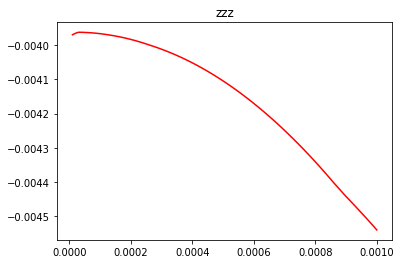

In [4]:
df_train_drop = df_train_ori.drop('ChanceofAdmit',1)
X = df_train_drop.values
y = df_train_ori.ChanceofAdmit.values
#print(X)
X_normalized = preprocessing.normalize(X, norm='l2')
#X_normalized = preprocessing.normalize(X, norm='l2')
#print(X_normalized)
colnames = df_train_drop.columns
kf = KFold(n_splits=5)
#kf.get_n_splits(X)
print(kf)
alpha_value=0.00001
max_score=0
max_score_alpha=0
alpha_valueArr = np.array([])
scoreArr = np.array([])
while alpha_value<0.007:
    scaler = StandardScaler()



    clf = Lasso(alpha=alpha_value,normalize=True)
    
    scores=cross_val_score(clf,X,y,scoring='neg_mean_squared_error',cv=kf)
    
    if max_score>np.mean(scores):
        max_score=np.mean(scores)
        max_score_alpha=alpha_value 
    alpha_valueArr = np.concatenate((alpha_valueArr, np.array([alpha_value])), axis=0)
    scoreArr = np.concatenate((scoreArr, np.array([np.mean(scores)])), axis=0)
    
    round(alpha_value,5)
    #print(alpha_value, scores, np.mean(scores))
    alpha_value += 0.00001
    #if np.max(scores)<0:
        #break
        
print('max: ',max_score, max_score_alpha)
#lasso = Lasso(alpha=max_score_alpha, normalize=True)

# Fit the regressor to the data
#lasso.fit(X,y)

#print(lasso.coef_)
    #print(scores, np.mean(scores))
clf = LinearRegression()
scores=cross_val_score(clf,X,y,cv=kf)
print(np.mean(scores))
print(colnames[0])
#print(alpha_valueArr.size, alpha_valueArr)
import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(scoreArr.size, scoreArr)

#for x in range(df_train_drop.shape[1]):
 #   plt.plot(lambdaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])
plt.title('zzz')

plt.plot(alpha_valueArr[0:100],scoreArr[0:100],'r')
plt.show()

Best alpha using built-in LassoCV: 0.001289
Best score using built-in LassoCV: 0.820766
Lasso picked 7 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

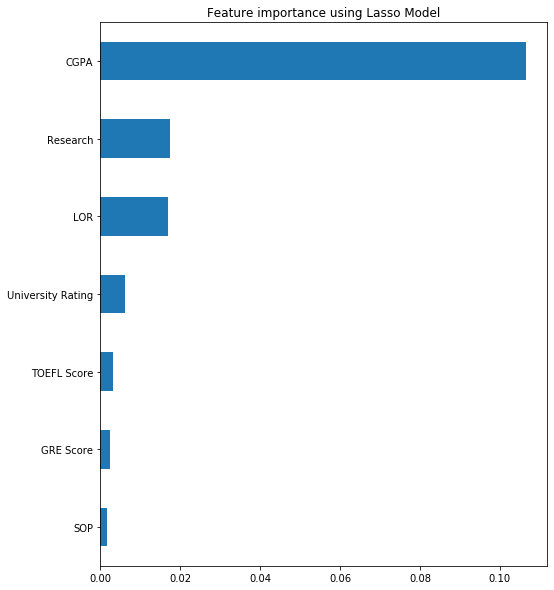

In [8]:


reg = LassoCV(cv=5)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = colnames)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Feature Selection

max:  -0.003962177033774833 2.825711502920827e-05
(7, 700)
0.8108015220863887
GRE Score
225 (225,)
36


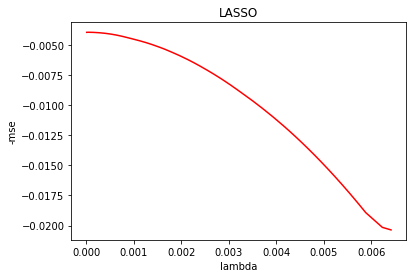

(225,)


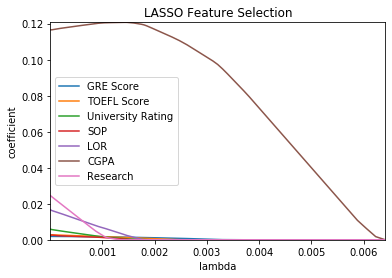

Maximum alpha where GRE Score  coefficient is nonzero :  [0.00370614]
Maximum alpha where TOEFL Score  coefficient is nonzero :  [0.00262148]
Maximum alpha where University Rating  coefficient is nonzero :  [0.00185426]
Maximum alpha where SOP  coefficient is nonzero :  [0.00160514]
Maximum alpha where LOR  coefficient is nonzero :  [0.00180152]
Maximum alpha where CGPA  coefficient is nonzero :  [0.00622997]
Maximum alpha where Research  coefficient is nonzero :  [0.00131158]


In [45]:
df_train_drop = df_train_ori.drop('ChanceofAdmit',1)
X = df_train_drop.values
y = df_train_ori.ChanceofAdmit.values
colnames = df_train_drop.columns
kf = KFold(n_splits=5)
alphas = np.logspace(-5, 0, 200)
#alpha_value=0.00001
max_score=-1
max_score_alpha=0
alpha_valueArr = np.array([])
scoreArr = np.array([])
index=0
result_coef = np.ndarray(shape=(df_train_drop.shape[1],700), dtype=float)
alphas = np.logspace(-5, 0, 400)
featureArr = np.ones((df_train_drop.shape[1],1))
for alpha_value in alphas:
#while alpha_value<1:
    
    clf = Lasso(alpha=alpha_value,normalize=True)
    #clf = Ridge(alpha=alpha_value,normalize=True)

    
    
    cv_result=cross_validate(clf,X,y,scoring='neg_mean_squared_error',cv=kf, return_estimator=True)
    scores = cv_result['test_score']
    
    
    if max_score<np.mean(scores):
        max_score=np.mean(scores)
        max_score_alpha=alpha_value 
    alpha_valueArr = np.concatenate((alpha_valueArr, np.array([alpha_value])), axis=0)
    scoreArr = np.concatenate((scoreArr, np.array([np.mean(scores)])), axis=0)
    
    #round(alpha_value,5)
    
    
    cv_result_es=cv_result['estimator']
    itercoef=((np.array(cv_result_es[0].coef_))+(np.array(cv_result_es[1].coef_))+(np.array(cv_result_es[2].coef_))+(np.array(cv_result_es[3].coef_))+(np.array(cv_result_es[4].coef_)))/5
    
    for i in range(7):
        result_coef[i][index]=itercoef[i]
        if itercoef[i]!=0:
            featureArr[i]=alpha_value
        
        
        
    #alpha_value += 0.00001
    index+=1
    
    if np.max(itercoef)==0:
        break
        
print('max: ',max_score, max_score_alpha)
print(np.array(result_coef).shape)

clf = LinearRegression()
scores=cross_val_score(clf,X,y,cv=kf)
print(np.mean(scores))
print(colnames[0])
#print(alpha_valueArr.size, alpha_valueArr)
import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(scoreArr.size, scoreArr)

#for x in range(df_train_drop.shape[1]):
 #   plt.plot(lambdaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])
plt.title('LASSO')
plt.xlabel('lambda')
plt.ylabel('-mse')
print(alpha_valueArr.shape[0],scoreArr.shape)
plt.plot(alpha_valueArr[0:(alpha_valueArr.shape[0])],scoreArr[0:(alpha_valueArr.shape[0])],'r')
print(np.argmax(scoreArr))
plt.show()
print(alpha_valueArr.shape)
#################

plt.title('LASSO Feature Selection')
plt.xlabel('lambda')
plt.ylabel('coefficient')
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','b', 'g', 'r', 'c', 'm', 'y', 'k']
for x in range(df_train_drop.shape[1]):
    plt.plot(alpha_valueArr[0:(alpha_valueArr.shape[0])],result_coef[x][0:(alpha_valueArr.shape[0])],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
#plt.ylim(0,np.mean(lasso.coef_))
plt.show()

for x in range(df_train_drop.shape[1]):
    print('Maximum alpha where',colnames[x],' coefficient is nonzero : ',featureArr[x])

max:  -0.003974423163021887 1e-05
(7, 10000)
0.8108015220863887
GRE Score
10000 (10000,)
0


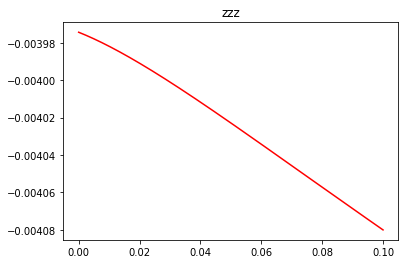

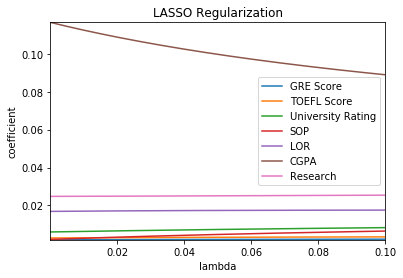

Maximum alpha where GRE Score  coefficient is nonzero :  [0.1]
Maximum alpha where TOEFL Score  coefficient is nonzero :  [0.1]
Maximum alpha where University Rating  coefficient is nonzero :  [0.1]
Maximum alpha where SOP  coefficient is nonzero :  [0.1]
Maximum alpha where LOR  coefficient is nonzero :  [0.1]
Maximum alpha where CGPA  coefficient is nonzero :  [0.1]
Maximum alpha where Research  coefficient is nonzero :  [0.1]


In [33]:
df_train_drop = df_train_ori.drop('ChanceofAdmit',1)
X = df_train_drop.values
y = df_train_ori.ChanceofAdmit.values
colnames = df_train_drop.columns
kf = KFold(n_splits=5)

alpha_value=0.00001
max_score=-1
max_score_alpha=0
alpha_valueArr = np.array([])
scoreArr = np.array([])
index=0
result_coef = np.ndarray(shape=(df_train_drop.shape[1],10000), dtype=float)
alphas = np.logspace(-5, 0, 400)
featureArr = np.ones((df_train_drop.shape[1],1))
#for alpha_value in alphas:
while alpha_value<0.1:
    scaler = StandardScaler()



    #clf = Lasso(alpha=alpha_value,normalize=True)
    clf = Ridge(alpha=alpha_value,normalize=True)

    
    
    cv_result=cross_validate(clf,X,y,scoring='neg_mean_squared_error',cv=kf, return_estimator=True)
    scores = cv_result['test_score']
    
    
    if max_score<np.mean(scores):
        max_score=np.mean(scores)
        max_score_alpha=alpha_value 
    alpha_valueArr = np.concatenate((alpha_valueArr, np.array([alpha_value])), axis=0)
    scoreArr = np.concatenate((scoreArr, np.array([np.mean(scores)])), axis=0)
    
    round(alpha_value,5)
    
    
    cv_result_es=cv_result['estimator']
    itercoef=((np.array(cv_result_es[0].coef_))+(np.array(cv_result_es[1].coef_))+(np.array(cv_result_es[2].coef_))+(np.array(cv_result_es[3].coef_))+(np.array(cv_result_es[4].coef_)))/5
    
    for i in range(7):
        result_coef[i][index]=itercoef[i]
        if itercoef[i]!=0:
            featureArr[i]=alpha_value
        
        
        
    alpha_value += 0.00001
    index+=1
    
    if np.max(itercoef)==0:
        break
        
print('max: ',max_score, max_score_alpha)
print(np.array(result_coef).shape)

clf = LinearRegression()
scores=cross_val_score(clf,X,y,cv=kf)
print(np.mean(scores))
print(colnames[0])
#print(alpha_valueArr.size, alpha_valueArr)
import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(scoreArr.size, scoreArr)

#for x in range(df_train_drop.shape[1]):
 #   plt.plot(lambdaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])
plt.title('zzz')
print(alpha_valueArr.shape[0],scoreArr.shape)
plt.plot(alpha_valueArr[0:(alpha_valueArr.shape[0])],scoreArr[0:(alpha_valueArr.shape[0])],'r')
print(np.argmax(scoreArr))
plt.show()

#################

plt.title('LASSO Regularization')
plt.xlabel('lambda')
plt.ylabel('coefficient')
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','b', 'g', 'r', 'c', 'm', 'y', 'k']
for x in range(df_train_drop.shape[1]):
    plt.plot(alpha_valueArr[0:(alpha_valueArr.shape[0])],result_coef[x][0:(alpha_valueArr.shape[0])],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
#plt.ylim(0,np.mean(lasso.coef_))
plt.show()

for x in range(df_train_drop.shape[1]):
    print('Maximum alpha where',colnames[x],' coefficient is nonzero : ',featureArr[x])

48
2.800503894183631e-05 -0.003962175972779953


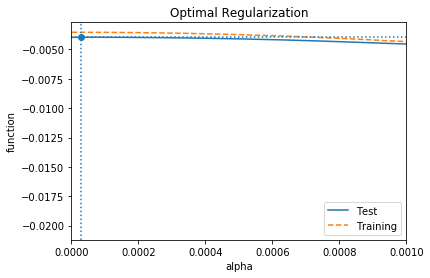

In [9]:
df_train_drop = df_train_ori.drop('ChanceofAdmit',1)
X = df_train_drop.values
y = df_train_ori.ChanceofAdmit.values
alphas = np.logspace(-6, 0, 200)
from sklearn.metrics import mean_squared_error
train_scores = []
test_scores = []
coefs=[]
#print(X.shape, y.shape)
#print(alphas)
for alpha in alphas:
    #print(alpha)
    model = Lasso(alpha=alpha, normalize=True, max_iter=10000000)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    cv_results=cross_validate(model, X, y, scoring="neg_mean_squared_error", cv=5)
    test_score = np.mean(cv_results['test_score'])
    train_scores.append(train_score)
    test_scores.append(test_score)
    #coefs.append(cv_result[])
    #print(train_score,test_score)

print(np.argmax(test_scores))
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)
print(optimal_alpha,optimal_score)
#print(train_scores,test_scores)
plt.plot(alphas, test_scores, "-", label="Test")
plt.plot(alphas, train_scores, "--", label="Training")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
#plt.axvline(0.006, color='r')
plt.title("Optimal Regularization")
plt.ylabel('function')
plt.xlabel('alpha')
plt.xlim(0,0.001)
#plt.ylim(-0.004,-0.0039)
plt.legend()
plt.show()

# Feature Selection (Normalize = True)

### The objective of Lasso is
`(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1`

In [ ]:
lassoCoefArr = np.ndarray(shape=(df_train_drop.shape[1],9000), dtype=float)
lambdaArr = np.array([])
featureArr = np.ones((df_train_drop.shape[1],1))


lambdaIter = 0.1
firstNonZeroIndex = 0
lastIndex=0

while(lambdaIter<=1):
#     print(lambdaIter)
    # create a lasso regressor
    lasso = Lasso(alpha=lambdaIter, normalize=True)

    # Fit the regressor to the data
    lasso.fit(X,y) 
    b = np.array([lambdaIter])
    c = np.array(lasso.coef_)
    lambdaArr = np.concatenate((lambdaArr, b), axis=0)
    
    
    for i in range(df_train_drop.shape[1]):
        lassoCoefArr[i][lastIndex]=lasso.coef_[i]
    
    numberOfNonZeroCoef=0
    for index in range(df_train_drop.shape[1]):
        if lasso.coef_[index]>0:
            numberOfNonZeroCoef +=1
            if featureArr[index] == 1:
                featureArr[index]=lambdaIter
    if numberOfNonZeroCoef==7:
        break
        
    lambdaIter -= 0.0001
    round(lambdaIter,5)
    if numberOfNonZeroCoef==0:
        firstNonZeroIndex += 1
    lastIndex +=1


firstNonZeroIndex -= 10
plt.title('LASSO Regularization')
plt.xlabel('lambda')
plt.ylabel('coefficient')
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','b', 'g', 'r', 'c', 'm', 'y', 'k']
for x in range(df_train_drop.shape[1]):
    plt.plot(lambdaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
plt.ylim(0,np.mean(lasso.coef_))
plt.show()

for x in range(df_train_drop.shape[1]):
    print('Maximum alpha where',colnames[x],' coefficient is nonzero : ',featureArr[x])

# Question
- alpha 값에 따른 feature들의 값과, 처음으로 각 feature가 nonzero가 되는 alpha 값이 어떤 의미가 있는가?
- 처음으로 feature가 nonzero가 되는 alpha 값이 크다면 Linear Regression으로 풀 때도 더 의미가 있는(= 영향력이 큰, 계수가 큰) 지표라고 볼 수 있는가?
- 처음으로 feature가 nonzero가 되는 alpha 값이 0.9999면..? (Normalize 안 했을 때)

In [ ]:
lassoCoefArr = np.ndarray(shape=(df_train_drop.shape[1],10000), dtype=float)
alphaArr = np.array([])
alphaIter = 0.9999
firstNonZeroIndex = 0
lastIndex=0
featureArr = np.zeros((df_train_drop.shape[1],1))
while(alphaIter>0):
    # create a lasso regressor
    lasso = Lasso(alpha=alphaIter)

    # Fit the regressor to the data
    lasso.fit(X,y)

    alphaArr = np.concatenate((alphaArr, np.array([alphaIter])), axis=0)
    
    for i in range(df_train_drop.shape[1]):
        lassoCoefArr[i][lastIndex]=lasso.coef_[i]
    
    numberOfNonZeroCoef=0
    for index in range(df_train_drop.shape[1]):
        if lasso.coef_[index]>0:
            numberOfNonZeroCoef +=1
            if featureArr[index] < alphaIter:
                featureArr[index]=alphaIter
    
    #if numberOfNonZeroCoef==7:
        #break
        
    alphaIter -= 0.0001
    round(alphaIter,5)
    if numberOfNonZeroCoef==0:
        firstNonZeroIndex += 1
    lastIndex +=1

if(firstNonZeroIndex>10):
    firstNonZeroIndex -= 10

plt.title('LASSO Regularization : Narrow View')
plt.xlabel('alpha')
plt.ylabel('coefficient')
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','b', 'g', 'r', 'c', 'm', 'y', 'k']
for x in range(df_train_drop.shape[1]):
    plt.plot(alphaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
plt.xlim(0,np.mean(featureArr))
plt.show()

plt.title('LASSO Regularization : Wide View')
plt.xlabel('alpha')
plt.ylabel('coefficient')

for x in range(df_train_drop.shape[1]):
    plt.plot(alphaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
#plt.xlim(0,np.mean(featureArr))
plt.ylim(0,np.mean(lasso.coef_))
plt.show()

for x in range(df_train_drop.shape[1]):
    print('Maximum alpha where',colnames[x],' coefficient is nonzero : ',featureArr[x])

In [ ]:
lasso = Lasso(alpha=0.001, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Plot the coefficients

plt.plot(range(len(colnames)), lasso.coef_)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.0001)
plt.show()

In [ ]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

In [ ]:
from sklearn.linear_model import Ridge

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [ ]:
arr = np.array([])
print(arr.dtype)
arrfirst = np.array([])
arrsecond= np.array([])
arrthird = np.array([])
arrfourth = np.array([])
arrfifth = np.array([])
arrsixth = np.array([])
arrseventh = np.array([])
alpha_value_loop = 0.1
index = 0

while(alpha_value_loop<=1):
#     print(alpha_value_loop)
    # create a lasso regressor
    lasso = Lasso(alpha=alpha_value_loop, normalize=True)

    # Fit the regressor to the data
    lasso.fit(X,y)
    b = np.array([alpha_value_loop])
    c = np.array(lasso.coef_)
    arr = np.concatenate((arr, b), axis=0)
    
    print(arrfirst.shape, np.array([lasso.coef_[0]]))
    arrfirst = np.concatenate((arrfirst, np.array([lasso.coef_[0]])),axis=0)
    arrsecond = np.concatenate((arrsecond, np.array([lasso.coef_[1]])),axis=0)
    arrthird = np.concatenate((arrthird, np.array([lasso.coef_[2]])),axis=0)
    arrfourth = np.concatenate((arrfourth, np.array([lasso.coef_[3]])),axis=0)
    arrfifth = np.concatenate((arrfifth, np.array([lasso.coef_[4]])),axis=0)
    arrsixth = np.concatenate((arrsixth, np.array([lasso.coef_[5]])),axis=0)
    arrseventh = np.concatenate((arrseventh, np.array([lasso.coef_[6]])),axis=0)
    
    
    temp=0
    for j in lasso.coef_:
        if j>0:
            temp += 1
    if temp==7:
        print("FINISH   : ",alpha_value_loop, lasso.coef_)
        break
        
    alpha_value_loop -= 0.0001
    round(alpha_value_loop,5)
    if temp==0:
        index += 1


index -= 10
plt.title('LASSO Regularization')
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.plot(arr[index:], arrfirst[index:], 'r', arr[index:], arrsecond[index:], 'b', arr[index:], arrthird[index:], 'g', arr[index:], arrfourth[index:], 'c', arr[index:], arrfifth[index:], 'k', arr[index:], arrsixth[index:], 'm',arr[index:], arrseventh[index:], 'y')
plt.margins(0.00001)
plt.ylim(0,np.mean(lasso.coef_))
plt.show()
